# Υπερεκπαιδεύοντας τα Σπίτια

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0) # for replicability purposes, not for production

* Για να δούμε πώς μπορούμε να κάνουμε πρόβλεψη μιας αριθμητικής τιμής, θα επιστρέψουμε στο γνώριμό μας σύνολο δεδομένων με τα σπίτια από την Καλιφόρνια.

In [2]:
california = fetch_california_housing(as_frame=True)
california.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


* Θα τα χωρίσουμε σε δεδομένα εκπαίδευσης και ελέγχου.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.20,
                                                    random_state=13)

* Θυμηθείτε ότι πρέπει να κανονικοποιήσουμε τα δεδομένα.

* Για το σκοπό αυτό μπορούμε στο TensorFlow να χρησιμοποιήσουμε το ειδικό στρώμα `Normalization`.

* Αυτό το χρησιμοποιούμε χρησιμοποιώντας τη μέθοδο `adapt()` στα δεδομένα εκπαίδευσης.

* Τότε θα διαβάσει τα δεδομένα και θα υπολογίσει το μέσο όρο, τη διακύμανση, και τον αριθμό των δεδομένων, για κάθε στήλη.

In [4]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

[[ 3.86e+00  2.87e+01  5.43e+00  1.10e+00  1.43e+03  3.10e+00  3.57e+01
  -1.20e+02]]
[[3.58e+00 1.58e+02 6.53e+00 2.43e-01 1.33e+06 1.34e+02 4.60e+00 4.04e+00]]
0


* Ξεκινάμε με ένα μοντέλο με 32 νευρώνες σε ένα κρυμμένο στρώμα και έναν νευρώνα στο στρώμα εξόδου.

* Δεν δίνουμε συνάρτηση ενεργοποίησης στο στρώμα εξόδου αφού θέλουμε να προβλέψουμε την τιμή του σπιτιού, άρα να πάρουμε το αποτέλεσμα του νευρώνα χωρίς να το υποχρεώνουμε να είναι σε κάποια όρια τιμών.

* Την απώλεια θα την μετράμε με βάση το Μέσο Απόλυτο Λάθος.

In [5]:
model = keras.Sequential([
        normalizer,
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Να το δούμε συνοπτικά.

* Παρατηρείστε ότι έχουμε παραμέτρους που δεν εκπαιδεύονται: είναι οι μέσοι όροι, οι διακυμάνσεις, και ο αριθμός των στοιχείων που έχει ήδη βρει το επίπεδο `Normalization`.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (16512, 8)                  │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

* Θα εκπαιδεύσουμε το μοντέλο μας για 100 εποχές.

* Σε κάθε εποχή τα τελευταία 20% των δεδομένων θα χρησιμοποιούνται για επικύρωση.

* Θα αποθηκεύσουμε την πορεία της εκπαίδευσης σε μία μεταβλητή `history`.

In [7]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0613 - val_loss: 0.5769
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5188 - val_loss: 0.4965
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4679 - val_loss: 0.4689
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4469 - val_loss: 0.4594
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4372 - val_loss: 0.4515
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4305 - val_loss: 0.4461
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4256 - val_loss: 0.4405
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4214 - val_loss: 0.4385
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4187 - val_loss: 0.4351
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4154 - val_loss: 0.4326
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4129 - val_loss: 0.4292
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η πορεία της εκπαίδευσης μας δείχνει την πρόοδο στην απώλεια εκπαίδευσης και στην απώλεια επικύρωσης, σε κάθε εποχή.

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,0.768418,0.576882,0
1,0.505887,0.496456,1
2,0.465539,0.468904,2
3,0.447077,0.459357,3
4,0.437770,0.451455,4
...,...,...,...
95,0.364389,0.386716,95
96,0.364581,0.387322,96
97,0.364608,0.384568,97
98,0.364442,0.387112,98


* Μπορούμε να δούμε την εξέλιξη αν φτιάξουμε μια βοηθητική συνάρτηση για την απεικόνιση.

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

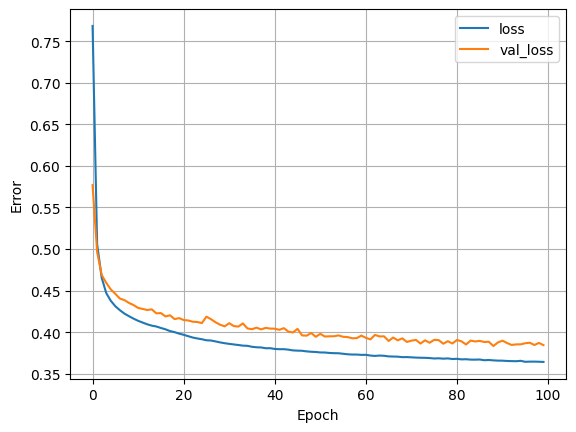

In [10]:
plot_loss(history)

* Βλέπουμε ότι η απώλεια στην επικύρωση αποκλίνει από την απώλεια εκπαίδευσης.

* Αυτό μπορεί να είναι δείγμα υπερπροσαρμογής.

* Αξιολογούμε το μοντέλο μας με βάση τα δεδομένα ελέγχου.

In [11]:
model.evaluate(X_test, y_test, verbose=0)

0.3845876455307007

* Ας δούμε αν θα τα πάμε καλύτερα με ένα μεγαλύτερο δίκτυο.

In [12]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Συνοπτικά:

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

* Εκπαιδεύουμε:

In [14]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8539 - val_loss: 0.4845
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4392 - val_loss: 0.4461
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4187 - val_loss: 0.4343
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4090 - val_loss: 0.4268
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4014 - val_loss: 0.4327
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3965 - val_loss: 0.4179
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3872 - val_loss: 0.4116
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3809 - val_loss: 0.4039
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3763 - val_loss: 0.4014
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3710 - val_loss: 0.3952
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3665 - val_loss: 0.3939
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η αξιολόγησή του:

In [15]:
model.evaluate(X_test, y_test, verbose=0)

0.345968097448349

* Τα πήγαμε μεν καλύτερα, αλλά οι δύο απώλειες άρχισαν να αποκλίνουν νωρίτερα.

* Επίσης, η απώλεια επικύρωσης δεν φαίνεται να βελτιώνεται σημαντικά από ένα σημείο και μετά.

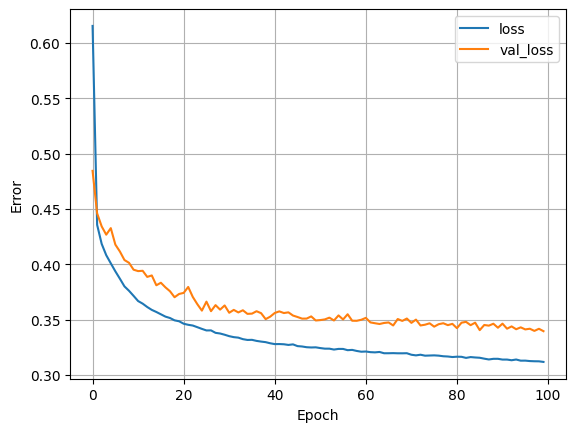

In [16]:
plot_loss(history)

* Προκειμένου να μην χάνουμε το χρόνο μας εκπαιδεύοντας το δίκτυο σε περισσότερες εποχές από όσες χρειάζεται, μπορούμε να χρησιμοποιήσουμε έναν μηχανισμό για πρόωρη διακοπή.

* Η εκπαίδευση θα διακοπεί αν δεν σημειωθεί βελτίωση σε δέκα εποχές.

In [17]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

* Ξαναφτιάχνουμε το μοντέλο μας.

In [18]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Αυτή τη φορά του δίνουμε τον κανόνα πρόωρης διακοπής μέσω της παραμέτρου `callbacks`.

In [19]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7910 - val_loss: 0.4753
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4447 - val_loss: 0.4376
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4195 - val_loss: 0.4277
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4053 - val_loss: 0.4147
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3931 - val_loss: 0.4068
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3852 - val_loss: 0.4006
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3780 - val_loss: 0.3944
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3735 - val_loss: 0.3881
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3687 - val_loss: 0.3903
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3671 - val_loss: 0.3842
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3642 - val_loss: 0.3809
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Πράγματι, σταματήσαμε πριν από τις 80 εποχές.

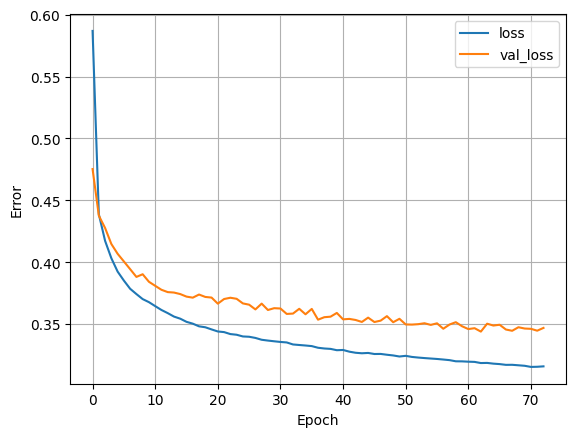

In [20]:
plot_loss(history)

* Η δε επίδοση του μοντέλου δεν επηρεάστηκε σημαντικά.

In [21]:
model.evaluate(X_test, y_test, verbose=0)

0.3456810712814331

* Ας φτιάξουμε τότε ένα ακόμα μεγαλύτερο μοντέλο να δούμε αν θα τα πάμε ακόμα καλύτερα.

In [22]:
model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Εκπαιδεύουμε:

In [23]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8011 - val_loss: 0.4667
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4331 - val_loss: 0.4439
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4135 - val_loss: 0.4286
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3994 - val_loss: 0.4146
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3866 - val_loss: 0.4079
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3786 - val_loss: 0.4022
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3748 - val_loss: 0.3931
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3659 - val_loss: 0.3883
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3620 - val_loss: 0.3858
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3595 - val_loss: 0.3844
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3565 - val_loss: 0.3850
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η απόκλιση μεταξύ των απωλειών μεγάλωσε ακόμα περισσότερο.

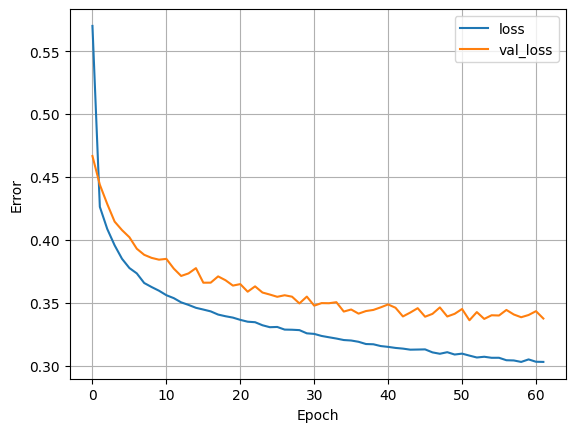

In [24]:
plot_loss(history)

* Η δε επίδοση έμεινε στα ίδια επίπεδα.

In [25]:
model.evaluate(X_test, y_test, verbose=0)

0.34007027745246887

* Και αν το μεγαλώσουμε ακόμα περισσότερο;

In [26]:
model = keras.Sequential([
        normalizer,
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Εκπαιδεύουμε:

In [27]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6714 - val_loss: 0.4577
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4245 - val_loss: 0.4300
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4000 - val_loss: 0.4030
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3808 - val_loss: 0.3882
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3714 - val_loss: 0.3827
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3638 - val_loss: 0.3783
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3580 - val_loss: 0.3654
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3512 - val_loss: 0.3642
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3466 - val_loss: 0.3662
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3465 - val_loss: 0.3598
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3407 - val_loss: 0.3593
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Εδώ κι αν μεγάλωσε η απόκλιση!

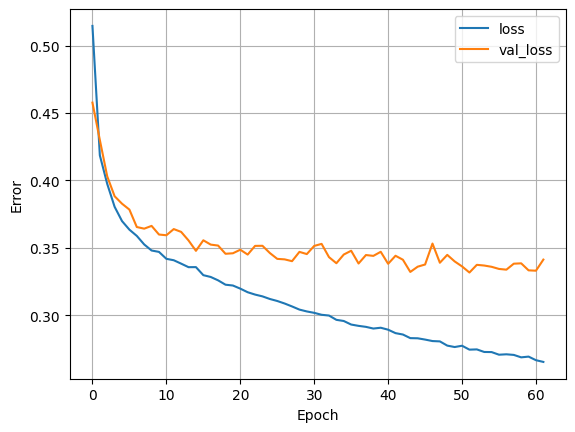

In [28]:
plot_loss(history)

* Και η επίδοση στα ίδια (ή μάλλον ανεπαίσθητα χειρότερα).

In [29]:
model.evaluate(X_test, y_test, verbose=0)

0.3461642265319824

* Γιατί συμβαίνει αυτό;

* Ας δούμε το μοντέλο.

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,582 (510.09 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 87,044 (340.02 KB)

* Έχουμε φτιάξει ένα μοντέλο που έχει περισσότερες παραμέτρους από όσα είναι τα δείγματά μας.

* Το μοντέλο παραείναι ισχυρό για τα δεδομένα που έχουμε στη διάθεσή μας.

* Ένα τέτοιο μοντέλο μπορεί να πέσει θύμα της υπερπροσαρμογής.

In [31]:
model.count_params()

43538

* Προσοχή! Όταν φτιάχνουμε νευρωνικά δίκτυα, δεν προσθέτουμε τυφλά στρώματα και νευρώνες.

* Τελικά αυτό που θα πετύχουμε είναι να φτιάξουμε ένα δίκτυο με τόσους νευρώνες και συνδέσεις ώστε πολύ γρήγορα θα αρχίσει να παπαγαλίζει τα δεδομένα.

* Πρέπει να διαστασιολογούμε το δίκτυο με βάση τον όγκο των δεδομένων του προβλήματός μας.

* Τα αποτελέσματα είναι αντίστοιχα (ίσως λίγο χειρότερα, αλλά δεν ψάξαμε τις υπερπαραμέτρους) με αυτά που πετύχαμε μέσω δένδρων αποφάσεων.

* Όπως μπορούμε να διαπιστώσουμε όμως, η εκπαίδευση των νευρωνικών δικτύων μπορεί να χρειάζεται περισσότερους πόρους.

* Επίσης όπως μπορούμε να διαπιστώσουμε, δεν έχουμε την ερμηνευσιμότητα που μπορούμε να έχουμε με άλλες μεθόδους.